In [58]:
# Muneel Haider
# 21i-0640
# Stat Modelling - Section A

#### ***Tools can provide answers, but real growth comes from the curiosity to understand the journey behind those answers***

---------

--------

***Generate 3 Synthetic dataset using scipy  [discrete data]***

---
- Each dataset should have 1000 points

- Keep parameter values as p1_real=0.67, p2_real=0.37, p3_real=0.57

- Hint... scipy.stat.bernoulli......


In [59]:
import numpy as np
from scipy.stats import bernoulli

p1_real, p2_real, p3_real = 0.67, 0.37, 0.57
n_samples = 1000

data1 = bernoulli.rvs(p1_real, size=n_samples)
data2 = bernoulli.rvs(p2_real, size=n_samples)
data3 = bernoulli.rvs(p3_real, size=n_samples)

print("Dataset 1:", data1[:10])
print("Dataset 2:", data2[:10])
print("Dataset 3:", data3[:10])

Dataset 1: [0 1 1 0 0 0 1 1 1 1]
Dataset 2: [0 0 0 0 1 1 0 0 1 1]
Dataset 3: [1 1 0 0 1 1 0 1 1 0]


***Pymc Model***

-----

you have to create model in such away to do inference from above synthetic data so
that to compare the infered parameter with the real paramter

In [60]:
import pymc as pm
import arviz as az

with pm.Model() as model1:

    p1 = pm.Uniform('p1', 0, 1)

    obs1 = pm.Bernoulli('obs1', p=p1, observed=data1)

    trace1 = pm.sample(1000, tune=1000, return_inferencedata=True)

Output()

Output()

In [61]:
with pm.Model() as model2:
    p2 = pm.Uniform('p2', 0, 1)
    obs2 = pm.Bernoulli('obs2', p=p2, observed=data2)
    trace2 = pm.sample(1000, tune=1000, return_inferencedata=True)

Output()

Output()

In [62]:
with pm.Model() as model3:
    p3 = pm.Uniform('p3', 0, 1)
    obs3 = pm.Bernoulli('obs3', p=p3, observed=data3)
    trace3 = pm.sample(1000, tune=1000, return_inferencedata=True)

Output()

Output()

***Posterior Summarization***

-----

- Use pm.summary and check the mean of the infered parameter
- plot the inference variable i.e trace via pm.plot_trace
- Do compare model inference with above real parameter in synthetic data


Summary for Dataset 1:
     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p1   0.7  0.014   0.674    0.728        0.0      0.0     907.0    1276.0   

    r_hat  
p1    1.0  
Summary for Dataset 2:
      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p2  0.372  0.015   0.343      0.4      0.001      0.0     760.0    1328.0   

    r_hat  
p2    1.0  
Summary for Dataset 3:
      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p3  0.551  0.016    0.52     0.58      0.001      0.0     874.0    1336.0   

    r_hat  
p3    1.0  


array([[<Axes: title={'center': 'p3'}>, <Axes: title={'center': 'p3'}>]],
      dtype=object)

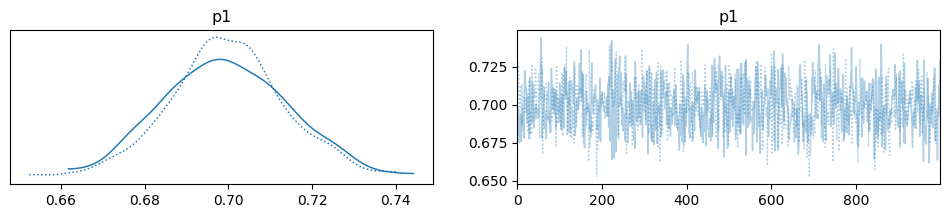

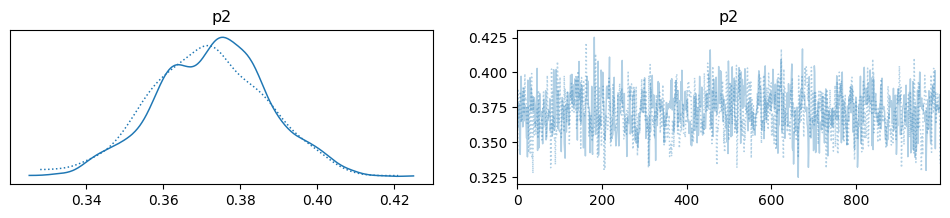

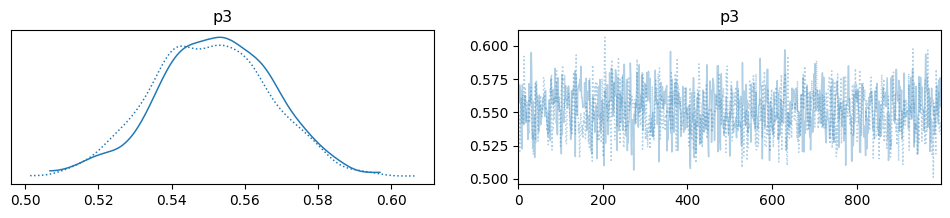

In [63]:
summary1 = pm.summary(trace1)
summary2 = pm.summary(trace2)
summary3 = pm.summary(trace3)

print("Summary for Dataset 1:\n", summary1)
print("Summary for Dataset 2:\n", summary2)
print("Summary for Dataset 3:\n", summary3)

az.plot_trace(trace1)
az.plot_trace(trace2)
az.plot_trace(trace3)

***Decision Based on the posterior***

-----

- Use ROPE and HDI to Show that the above data is baised
- Use ROPE [0.3, 0.6]
- for more see book chapter 2 about ROPE

In [64]:
rope = [0.3, 0.6]

hdi1 = az.hdi(trace1, hdi_prob=0.95)['p1']
print("HDI for Dataset 1:", hdi1)
print("Is Dataset 1 biased?", not (rope[0] <= hdi1[0] and hdi1[1] <= rope[1]))

hdi2 = az.hdi(trace2, hdi_prob=0.95)['p2']
print("HDI for Dataset 2:", hdi2)
print("Is Dataset 2 biased?", not (rope[0] <= hdi2[0] and hdi2[1] <= rope[1]))

hdi3 = az.hdi(trace3, hdi_prob=0.95)['p3']
print("HDI for Dataset 3:", hdi3)
print("Is Dataset 3 biased?", not (rope[0] <= hdi3[0] and hdi3[1] <= rope[1]))

HDI for Dataset 1: <xarray.DataArray 'p1' (hdi: 2)> Size: 16B
array([0.67212029, 0.72762497])
Coordinates:
  * hdi      (hdi) <U6 48B 'lower' 'higher'
Is Dataset 1 biased? True
HDI for Dataset 2: <xarray.DataArray 'p2' (hdi: 2)> Size: 16B
array([0.34141724, 0.40037236])
Coordinates:
  * hdi      (hdi) <U6 48B 'lower' 'higher'
Is Dataset 2 biased? False
HDI for Dataset 3: <xarray.DataArray 'p3' (hdi: 2)> Size: 16B
array([0.52083281, 0.58233994])
Coordinates:
  * hdi      (hdi) <U6 48B 'lower' 'higher'
Is Dataset 3 biased? False


***Do predicrtion based on the learned parameter***

----

- predict next 100 samples

In [68]:
with model1:
    post_pred1 = pm.sample_posterior_predictive(trace1)
    pred1 = post_pred1.posterior_predictive["obs1"].values.flatten()[:100]

with model2:
    post_pred2 = pm.sample_posterior_predictive(trace2)
    pred2 = post_pred2.posterior_predictive["obs2"].values.flatten()[:100]

with model3:
    post_pred3 = pm.sample_posterior_predictive(trace3)
    pred3 = post_pred3.posterior_predictive["obs3"].values.flatten()[:100]


Output()

Output()

Output()

In [69]:
print("Predictions for Dataset 1:", pred1)

Predictions for Dataset 1: [1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1]


In [70]:
print("Predictions for Dataset 2:", pred2)

Predictions for Dataset 2: [0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1
 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1
 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1]


In [71]:
print("Predictions for Dataset 3:", pred3)

Predictions for Dataset 3: [1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1
 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1]
